<a href="https://colab.research.google.com/github/yongsa-nut/SF251_67_2/blob/main/SF_251_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.5.0+cu121


# Tensor

## From Python to PyTorch

In [ ]:
# First, let's import necessary libraries
import numpy as np

# Python List
python_list = [1, 2, 3, 4]
print("Python List:", python_list)

# NumPy Array
numpy_array = np.array([1, 2, 3, 4])
print("NumPy Array:", numpy_array)

# PyTorch Tensor
torch_tensor = torch.tensor([1, 2, 3, 4])
print("PyTorch Tensor:", torch_tensor)

Python List: [1, 2, 3, 4]
NumPy Array: [1 2 3 4]
PyTorch Tensor: tensor([1, 2, 3, 4])


## Tensor Dimensions Visualization

In [ ]:
# 0D Tensor (Scalar)
scalar = torch.tensor(5)
print("0D Tensor (Scalar):")
print(scalar)
print("Shape:", scalar.shape)

0D Tensor (Scalar):
tensor(5)
Shape: torch.Size([])


In [ ]:
# 1D Tensor (Vector)
vector = torch.tensor([1, 2, 3, 4])
print("1D Tensor (Vector):")
print(vector)
print("Shape:", vector.shape)

1D Tensor (Vector):
tensor([1, 2, 3, 4])
Shape: torch.Size([4])


In [ ]:
# 2D Tensor (Matrix)
matrix = torch.tensor([[1, 2, 3],
                      [4, 5, 6]])
print("2D Tensor (Matrix):")
print(matrix)
print("Shape:", matrix.shape)

2D Tensor (Matrix):
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])


In [ ]:
# 3D Tensor (Cube)
cube = torch.tensor([[[1, 2],
                     [3, 4]],
                    [[5, 6],
                     [7, 8]]])
print("3D Tensor (Cube):")
print(cube)
print("Shape:", cube.shape)

3D Tensor (Cube):
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Shape: torch.Size([2, 2, 2])


## Ways to create Tensors

In [ ]:
# Zeros
print("Zeros tensor (3x3):")
print(torch.zeros(3, 3))

In [ ]:
# Ones
print("Ones tensor (2x2):")
print(torch.ones(2, 2))

In [ ]:
# Random tensors
print("Random tensor (uniform distribution):")
print(torch.rand(2, 3))

In [ ]:
print("Random tensor (normal distribution):")
print(torch.randn(2, 3))

In [ ]:
# Image Example (3D Tensor)
# [channels, height, width]
image_tensor = torch.rand(3, 64, 64)
print("Image Tensor Shape:", image_tensor.shape)

Image Tensor Shape: torch.Size([3, 64, 64])


## Tensor Properties

In [ ]:
# Create a tensor
t = torch.tensor([[1, 2, 3],
                 [4, 5, 6]], dtype=torch.float32)

# Basic properties
print("\nTensor Properties:")
print("Shape:", t.shape)
print("Data Type:", t.dtype)
print("Device:", t.device)
print("Requires Gradient:", t.requires_grad)

# Computational Graph and Auto Grad

In [ ]:
# Basic Example 1
x = torch.tensor([1.0,2.0,3.0], requires_grad=True)
print(x)

y = x+2
print(y)

tensor([1., 2., 3.], requires_grad=True)
tensor([3., 4., 5.], grad_fn=<AddBackward0>)


In [ ]:
!pip install torchviz

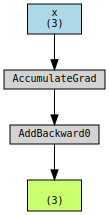

In [ ]:
graph = make_dot(y, params={"x": x})
graph

In [ ]:
# Basic example 2
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Operations create the computational graph
z = x * y
w = z + x

# Compute gradients
w.backward()

print(f"x.grad: {x.grad}")  # dw/dx = y + 1
print(f"y.grad: {y.grad}")  # dw/dy = x

x.grad: 4.0
y.grad: 2.0


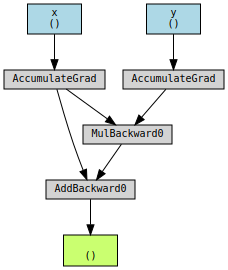

In [ ]:
from torchviz import make_dot

# Create tensors
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Define computation
z = x * y
w = z + x

# Visualize the graph
graph = make_dot(w, params={"x": x, "y": y})
graph

### Computational Example 3

In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

where we use $\ell(x)$ to denote the number of elements in $x$. In other words, we are taking a mean here over the operation within the sum.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [ ]:
# Build the graph
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


Using the statements above, we have created a computation graph that looks similar to the figure below:

<center style="width: 100%"><img src="https://raw.githubusercontent.com/phlippe/uvadlc_notebooks/refs/heads/master/docs/tutorial_notebooks/tutorial2/pytorch_computation_graph.svg" width="200px"></center>

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [ ]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:`

In [ ]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

## Gradient Accumulation Example

In [ ]:
# Create tensor with gradient tracking
x = torch.tensor(1.0, requires_grad=True)

# Multiple operations
y = x + 2
z = y * y * 2

# Compute gradients
z.backward()
print(f"First gradient: {x.grad}")  # dz/dx

# Gradients accumulate by default
z = y * y * 2
z.backward()
print(f"Accumulated gradient: {x.grad}")  # dz/dx  + dz/dx

First gradient: 12.0
Accumulated gradient: 24.0


In [ ]:
# Reset gradients
x.grad.zero_()
print(f"After reset: {x.grad}")  # 0

The following is the typically loop pattern that we will encounter.

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)
  #weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Backpropagation

In [ ]:
# Simple linear regression

x = torch.tensor(1.0)
y = torch.tensor(2.0) # y = 2*x

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

# update w
# keep going

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## Linear Regression Example

In [ ]:
# Numpy version

# f = 2 * x
X = np.array([1.0, 2.0, 3.0, 4.0])
Y = np.array([2.0, 4.0, 6.0, 8.0])

w = 0.0

# model prediction
def forward(x):
  return w*x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/n* (w*x - y)**2
# dj/dw = 2/n*(w*x - y)*x
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw = gradient(X,Y, y_pred)

  # update weights
  w -= (learning_rate*dw)

  print(f'epoch {epoch+1}: w ={w:.3f}, loss = {l:.5f}')

print(f'Prediction before training: f(5) = {forward(5):.3f}')

### Gradients Computation: Autograd

In [ ]:
# Pytorch version 1

# f = 2 * x
X = torch.tensor([1.0, 2.0, 3.0, 4.0])
Y = torch.tensor([2.0, 4.0, 6.0, 8.0])

w = torch.tensor(0.0, requires_grad=True)

# model prediction
def forward(x):
  return w*x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 50

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  l.backward() # dl/dw

  # update weights
  with torch.no_grad():
    w -= (learning_rate*w.grad)

  # zero gradients
  w.grad.zero_()

  print(f'epoch {epoch+1}: w ={w:.3f}, loss = {l:.5f}')

print(f'Prediction before training: f(5) = {forward(5):.3f}')

### Full Pytorch Linear Regression

1) Design model (input, output size, forward pass)

2) Construct loss and Optimizer

3) Training loop:
  - forward pass: compute prediction
  - backward pass: gradients
  - update weights

In [ ]:
import torch.nn as nn

# f = 2 * x
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]]) # new shape
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])
X_test = torch.tensor([5.0])

input_size = 1
output_size = 1
model = nn.Linear(input_size,output_size) #input_size, output_size

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss() # loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  l.backward() # dl/dw

  # update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  [w,b] = model.parameters()
  print(f'epoch {epoch+1}: w ={w[0][0].item():.3f}, loss = {l:.5f}')

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

### Custom Linear Regression Model

How to create models in pytorch
- Create a class which inherit `nn.Module`
- define layers in `__init__`
- Implement forward method

In [ ]:
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super().__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

In [ ]:
model = LinearRegression(1, 1)
# Printing a module shows all its submodules
print(model)

LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter lin.weight, shape torch.Size([1, 1])
Parameter lin.bias, shape torch.Size([1])


In [ ]:
# f = 2 * x
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]]) # new shape
Y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])
X_test = torch.tensor([5.0])

input_size = 1
output_size = 1

class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super().__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)
model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss() # loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  l.backward() # dl/dw

  # update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  [w,b] = model.parameters()
  print(f'epoch {epoch+1}: w ={w[0][0].item():.3f}, loss = {l:.5f}')

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Simple Neuron Network in Pytorch

1) DataLoader, Transformation

2) Multilayer Neural Net, Activation Function

3) Loss and Optimizer

4) Training Loop (batch training)

5) Model Evaluation

6) GPU support

## Feed Forward Neuron Network

In [ ]:
# Example of a Feedforward Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(784, 300, 10)
print(model)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=300, out_features=10, bias=True)
)


In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter fc1.weight, shape torch.Size([300, 784])
Parameter fc1.bias, shape torch.Size([300])
Parameter fc2.weight, shape torch.Size([10, 300])
Parameter fc2.bias, shape torch.Size([10])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Full code Example

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # 0.1307 is the mean of all MNIST training image and 0.3081 is standard deviation
])

train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True,
    transform=transform,
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform)

# Data loader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# Feedforward Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store metrics
train_losses = []
train_accuracies = []

# Training loop
total_steps = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], '
                  f'Loss: {loss.item():.4f}')

    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    # Store metrics
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Loss: {epoch_loss:.4f}, '
          f'Accuracy: {epoch_acc:.2f}%')

Accuracy of the network on the 10000 test images: 97.95%


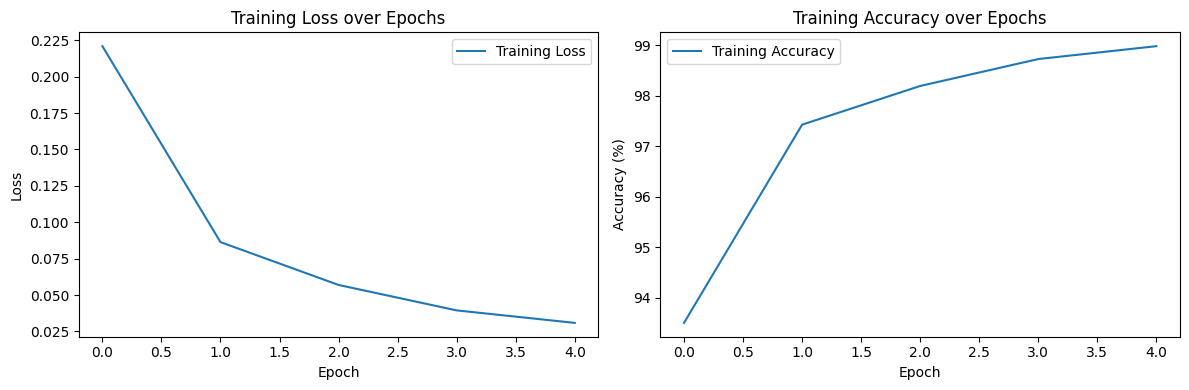

In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

# Plotting training metrics
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
torch.save(model.state_dict(), 'mnist_ffn.pth')

# Exercise: FashionMNIST

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Hyperparameter
batch_size = 100

# Data Loader
# FashionMNIST Classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# FashionMNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))  # FashionMNIST mean and std
])

train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    transform=transform
)

# Data loader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
# Visualize data
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(img.squeeze(), cmap='gray')

# Get some random train images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Print images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    imshow(images[i])

Model Part
- Exercise: Update this code
- Feel free to add more layers

In [ ]:
# Hyperparameters
input_size = 784  # 28x28
hidden_size1 = ...
hidden_size2 = ...
num_classes = ...
learning_rate = ... # something very small
num_epochs = ...

# Feedforward Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        # Update here too!
        return out

model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)
print(model)

Training Part

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store metrics
train_losses = []
train_accuracies = []

# Training loop
total_steps = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], '
                  f'Loss: {loss.item():.4f}')

    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    # Store metrics
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Loss: {epoch_loss:.4f}, '
          f'Accuracy: {epoch_acc:.2f}%')

In [ ]:
# Test the model
model.eval()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Calculate per-class accuracy
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

    print(f'Overall Accuracy of the network on the test images: {100 * correct / total:.2f}%')

    # Print accuracy for each class
    for i in range(10):
        print(f'Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]:.2f}%')

# Plotting training metrics
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Visualize some predictions
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(img.squeeze(), cmap='gray')

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Print images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    imshow(images[i])

    # Get predictions
    image = images[i].reshape(-1, 28*28).to(device)
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    plt.title(f'Pred: {classes[predicted[0]]}\nTrue: {classes[labels[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()